In [1]:
#j'importe les biblios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("D:\machine learning\\abdu\CC MBOUPDA JOYCE\Churn_Clean.csv")
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:1: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Elie\AppData\Local\Temp\ipykernel_9272\486185768.py:1: SyntaxWarning: invalid escape sequence '\m'
  df = pd.read_csv("D:\machine learning\\abdu\CC MBOUPDA JOYCE\Churn_Clean.csv")


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_freq_encode
0,619.0,0.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1,0.5014
1,608.0,0.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0,0.2477
2,502.0,0.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1,0.5014
3,699.0,0.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0,0.5014
4,850.0,0.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0,0.2477


In [4]:
#Split data to X et y
X = df.drop(['Exited'], axis=1)
y = df[['Exited']]
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [5]:
#Split data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train 


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_freq_encode
9254,686.0,1.0,32.0,6.0,0.00,2.0,1.0,1.0,179093.26,0.5014
1561,632.0,1.0,42.0,4.0,119624.60,2.0,1.0,1.0,195978.86,0.2509
1670,559.0,1.0,24.0,3.0,114739.92,1.0,1.0,0.0,85891.02,0.2477
6087,561.0,0.0,27.0,9.0,135637.00,1.0,1.0,0.0,153080.40,0.5014
6669,517.0,1.0,56.0,9.0,142147.32,1.0,0.0,0.0,39488.04,0.5014
...,...,...,...,...,...,...,...,...,...,...
5734,768.0,1.0,54.0,8.0,69712.74,1.0,1.0,1.0,69381.05,0.5014
5191,682.0,0.0,58.0,1.0,0.00,1.0,1.0,1.0,706.50,0.5014
5390,735.0,0.0,38.0,1.0,0.00,3.0,0.0,0.0,92220.12,0.5014
860,667.0,1.0,43.0,8.0,190227.46,1.0,1.0,0.0,97508.04,0.5014


In [6]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Entraînement
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)



c:\Users\Elie\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [7]:
# Prédictions
y_pred = model_nb.predict(X_test)




Accuracy: 0.796

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.96      0.88      1607
           1       0.43      0.13      0.20       393

    accuracy                           0.80      2000
   macro avg       0.63      0.54      0.54      2000
weighted avg       0.74      0.80      0.75      2000

confusion matrix(train):


<Axes: >

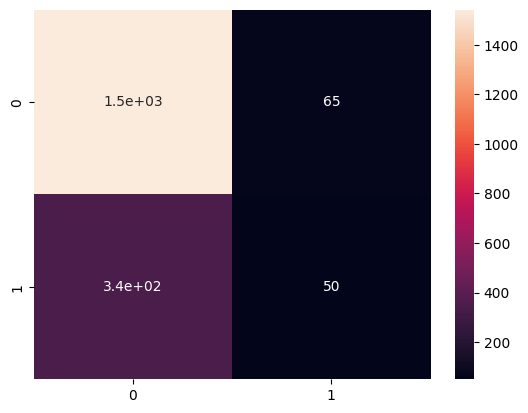

In [10]:
# Évaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm_train=confusion_matrix(y_test,y_pred)
print('confusion matrix(train):')
sns.heatmap(cm_train, annot=True)

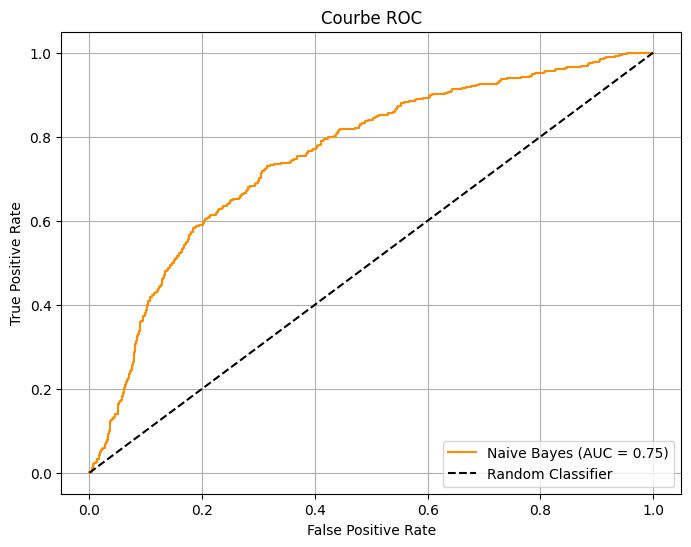

In [13]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Probabilités pour la classe 1 (Exited = 1)
y_proba = model_nb.predict_proba(X_test)[:, 1]

# Courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

# Affichage de la courbe
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Naive Bayes (AUC = {auc:.2f})", color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()





In [15]:
import joblib
joblib.dump(model_nb, "Naive.pkl")


['Naive.pkl']